In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

In [6]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
content = requests.get(url).content
data = pd.read_csv(io.StringIO(content.decode('utf-8')))
indiaData = data[data.location=='India']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
19266,IND,Asia,India,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
19267,IND,Asia,India,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
19268,IND,Asia,India,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
19269,IND,Asia,India,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
19270,IND,Asia,India,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


In [7]:
indiaData.head()
indiaData.date = pd.to_datetime(cases.Date, format='%d/%m/%y')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
19266,IND,Asia,India,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
19267,IND,Asia,India,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
19268,IND,Asia,India,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
19269,IND,Asia,India,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
19270,IND,Asia,India,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


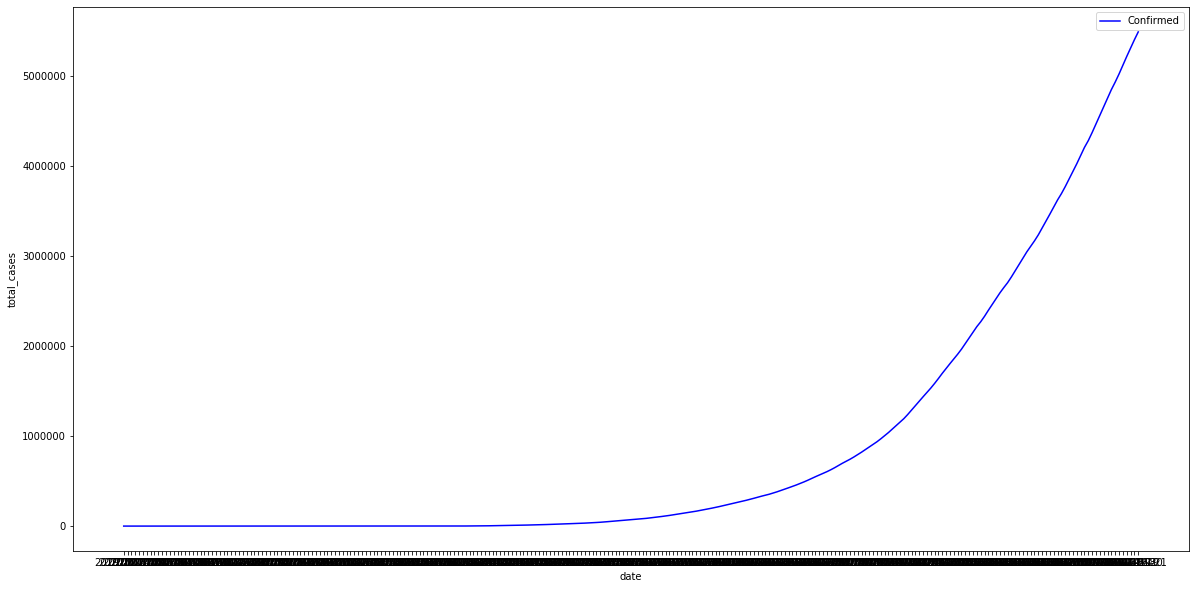

In [10]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='date', y='total_cases', data=indiaData, label='Confirmed', color='blue')
plt.title('Covid-2019 Status for India as of 04/06')